# <font color="#CA3532">Métodos de optimización</font> 

Comparamos varios de los métodos de optimización disponibles en TensorFlow.


In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

Función a optimizar:

$$
f(x, y) = a x^{2} + b y^{2} + c xy
$$

La siguiente celda define la función para valores arbitrarios de a, b y c:

In [2]:
def cuadratica(x, y, a=1.0, b=1.0, c=0.0):
  return a*x*x + b*y*y + c*x*y

Y aquí hacemos una evaluación particular de la función:

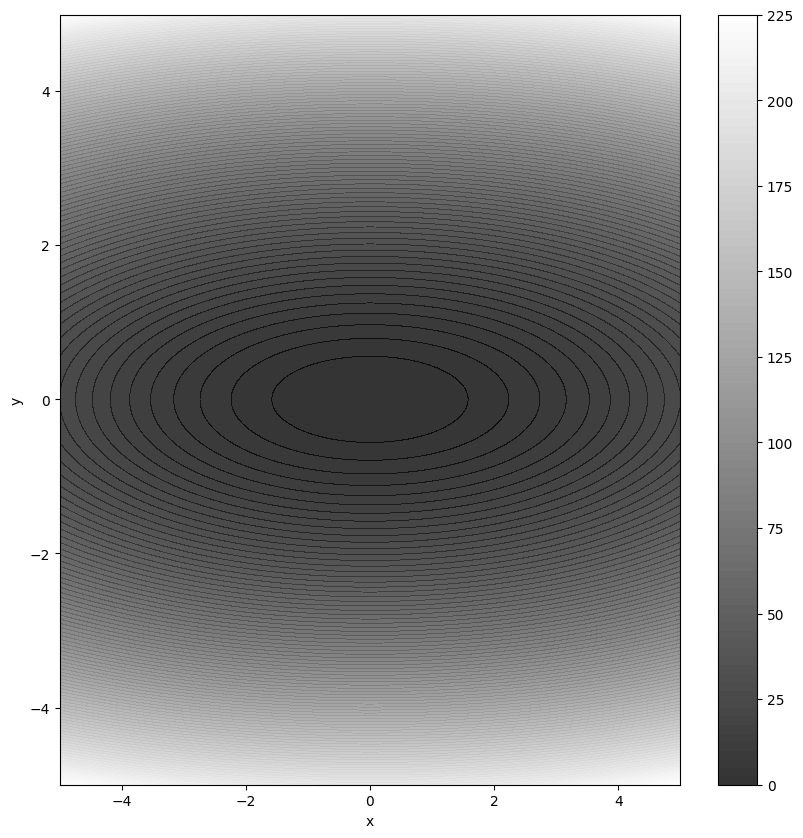

In [3]:
f = lambda x, y: cuadratica(x, y, a=1.0, b=8.0, c=0.0)

xvalues = np.arange(-5.0, 5.0, 0.01)
yvalues = np.arange(-5.0, 5.0, 0.01)
xx, yy = np.meshgrid(xvalues, yvalues)

zz = f(xx, yy)

plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, zz, 100, cmap="gray", alpha=.8)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

Función para dibujar gráficas:

In [4]:
def graficas(xx, yy, zz, hx, hy):
  # Figura 1:
  plt.figure(figsize=(8, 8))
  plt.contourf(xx, yy, zz, 100, cmap="gray", alpha=.8)
  plt.plot(hx, hy, '.-')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.axis([-5, 5, -5, 5])
  plt.show()

  # Figura 2:
  plt.figure(figsize=(8, 4))
  plt.plot(hx, '.-')
  plt.plot(hy, '.-')
  plt.grid(True)
  plt.xlabel('tiempo')
  plt.legend(('x', 'y'))
  plt.axis([0, len(hx), -5, 5])
  plt.show()

Descenso por gradiente:

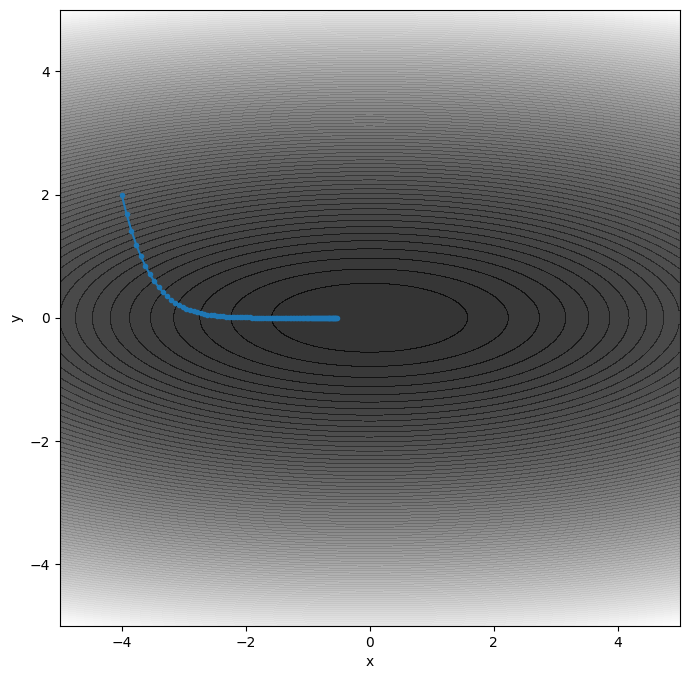

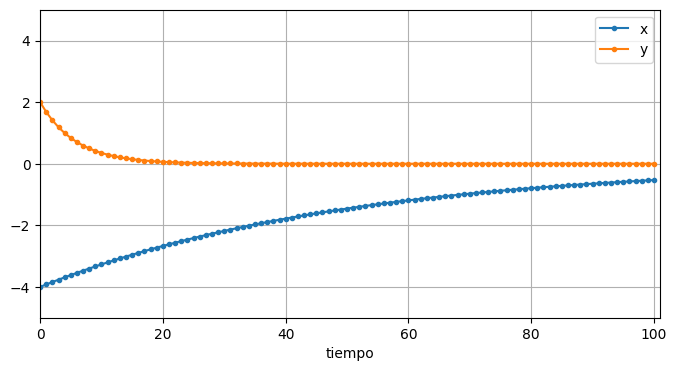

In [5]:
# Posicion (x, y) inicial:
x = tf.Variable(-4.0)
y = tf.Variable(2.0)

# Factor de aprendizaje:
learning_rate = 0.01

# Lista para almacenar los valores que va tomando (x, y):
hx = [x.numpy()]
hy = [y.numpy()]

# Numero de iteraciones:
niters = 100

# Bucle de optimizacion:
for i in range(niters):
  # Definicion del grafo:
  with tf.GradientTape(persistent=True) as tape:
    z = f(x, y)

  # Calculo del gradiente:
  grad_x = tape.gradient(z, x) 
  grad_y = tape.gradient(z, y) 

  # Actualizacion de (x, y):
  new_x = x - learning_rate*grad_x 
  new_y = y - learning_rate*grad_y 
  x.assign(new_x)
  y.assign(new_y)

  # Actualizamos las listas:
  hx.append(x.numpy())
  hy.append(y.numpy())

graficas(xx, yy, zz, hx, hy)

Lo mismo pero con distintos optimizadores de TensorFlow:


In [6]:
def train(f, x0, y0, optimizador, niters):
  # Posicion (x, y) inicial:
  x = tf.Variable(x0)
  y = tf.Variable(y0)

  # Lista para almacenar los valores que va tomando (x, y):
  hx = [x.numpy()]
  hy = [y.numpy()]

  # Bucle de optimizacion:
  for i in range(niters):
    # Definicion del grafo:
    with tf.GradientTape(persistent=True) as tape:
      z = f(x, y)

    # Calculo del gradiente:
    grad_x = tape.gradient(z, x) 
    grad_y = tape.gradient(z, y) 

    optimizador.apply_gradients(zip([grad_x, grad_y], [x, y]))

    # Actualizamos las listas:
    hx.append(x.numpy())
    hy.append(y.numpy())

  return hx, hy

SGD:

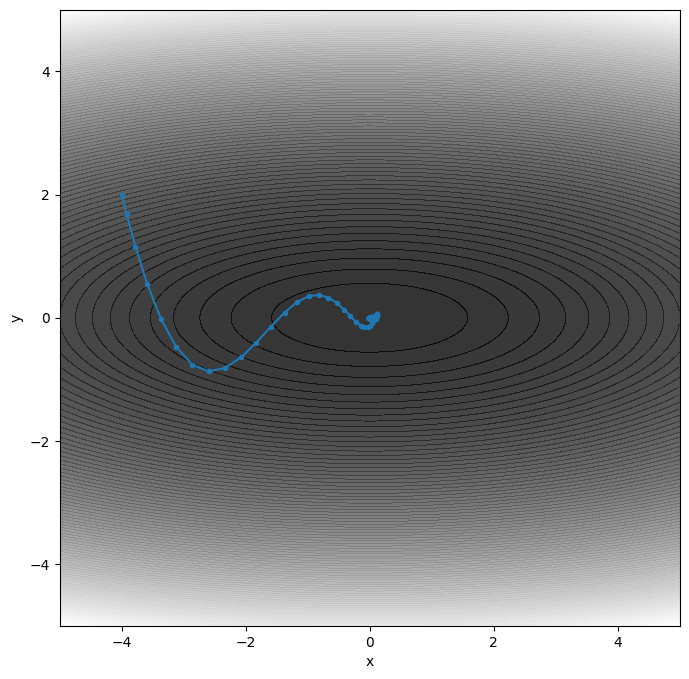

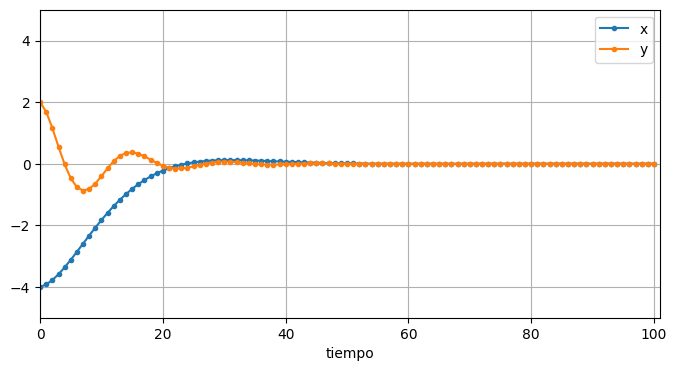

In [8]:
learning_rate = 0.01 
momentum = 0.8
nesterov = False
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum, nesterov=nesterov)
hx, hy = train(f, -4.0, 2.0, optimizer, 100)
graficas(xx, yy, zz, hx, hy)

Comparativa entre SGD, SGD con momento y SGD con momento de Nesterov:

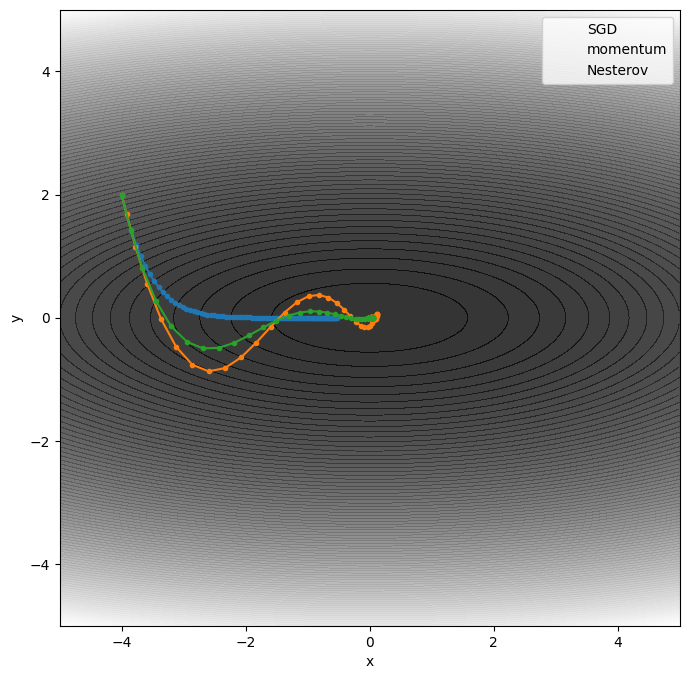

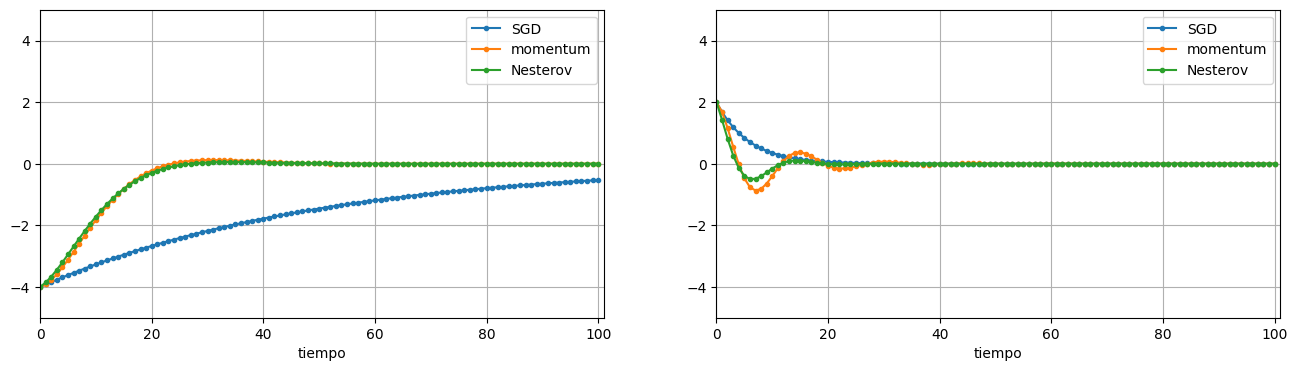

In [9]:
learning_rate = 0.01
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.0)
hx_sgd, hy_sgd = train(f, -4.0, 2.0, optimizer, 100)
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.8, nesterov=False)
hx_momentum, hy_momentum = train(f, -4.0, 2.0, optimizer, 100)
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.8, nesterov=True)
hx_nesterov, hy_nesterov = train(f, -4.0, 2.0, optimizer, 100)

plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, zz, 100, cmap="gray", alpha=.8)
plt.plot(hx_sgd, hy_sgd, '.-')
plt.plot(hx_momentum, hy_momentum, '.-')
plt.plot(hx_nesterov, hy_nesterov, '.-')
plt.legend(('SGD', 'momentum', 'Nesterov'))
plt.xlabel('x')
plt.ylabel('y')
plt.axis([-5, 5, -5, 5])
plt.show()

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(hx_sgd, '.-')
plt.plot(hx_momentum, '.-')
plt.plot(hx_nesterov, '.-')
plt.grid(True)
plt.xlabel('tiempo')
plt.legend(('SGD', 'momentum', 'Nesterov'))
plt.axis([0, len(hx), -5, 5])

plt.subplot(1, 2, 2)
plt.plot(hy_sgd, '.-')
plt.plot(hy_momentum, '.-')
plt.plot(hy_nesterov, '.-')
plt.grid(True)
plt.xlabel('tiempo')
plt.legend(('SGD', 'momentum', 'Nesterov'))
plt.axis([0, len(hx), -5, 5])

plt.show()

Adagrad:

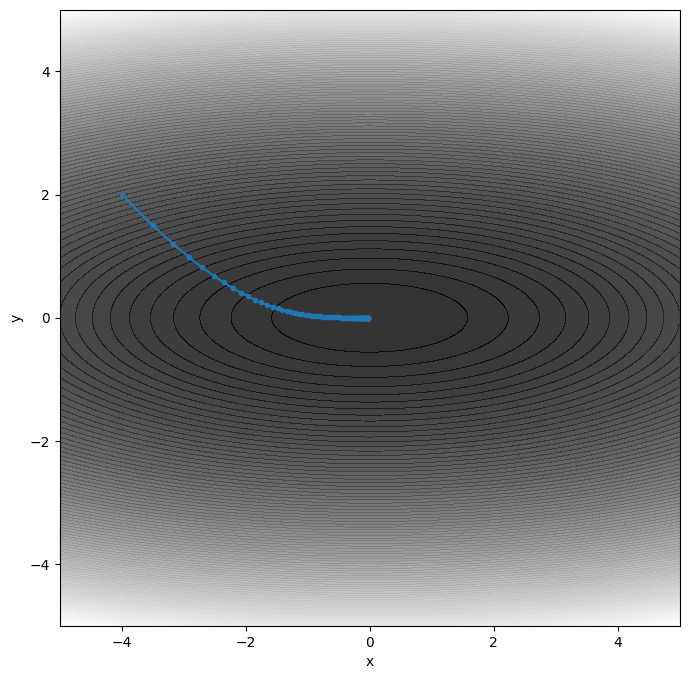

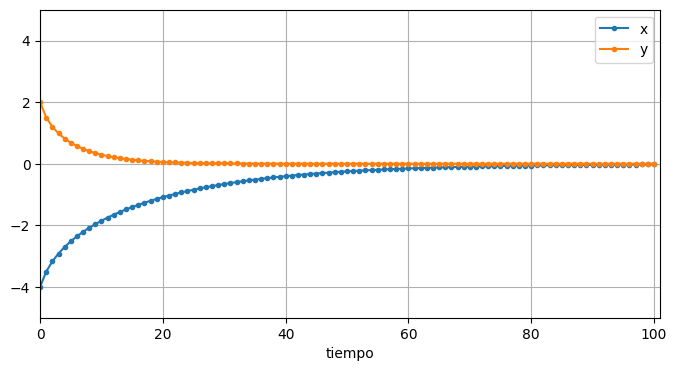

In [10]:
learning_rate = 0.5
optimizer = tf.keras.optimizers.Adagrad(learning_rate=learning_rate)
hx, hy = train(f, -4.0, 2.0, optimizer, 100)
graficas(xx, yy, zz, hx, hy)

RMSProp:

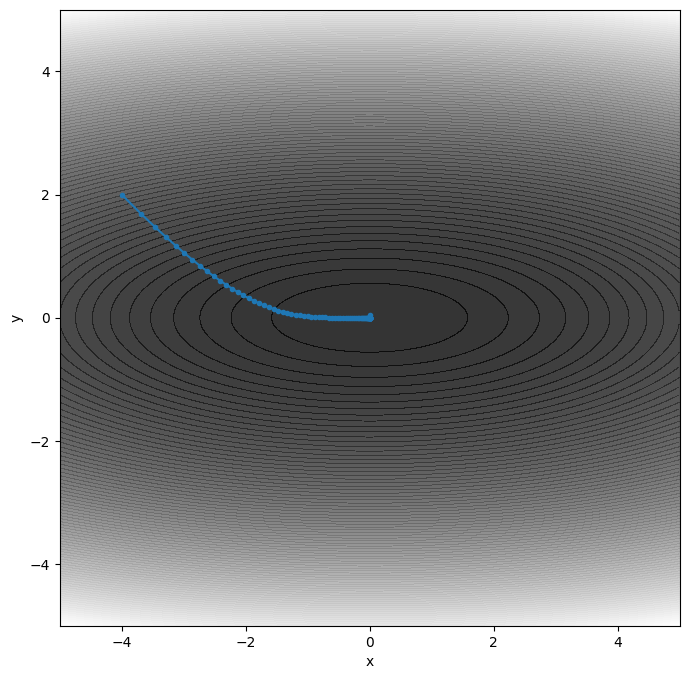

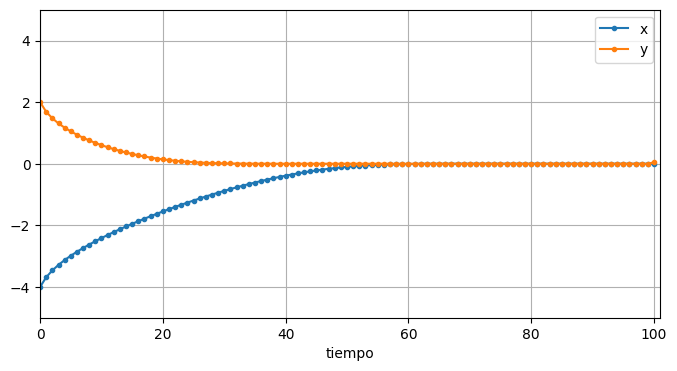

In [11]:
learning_rate = 0.1
optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
hx, hy = train(f, -4.0, 2.0, optimizer, 100)
graficas(xx, yy, zz, hx, hy)

Adam:

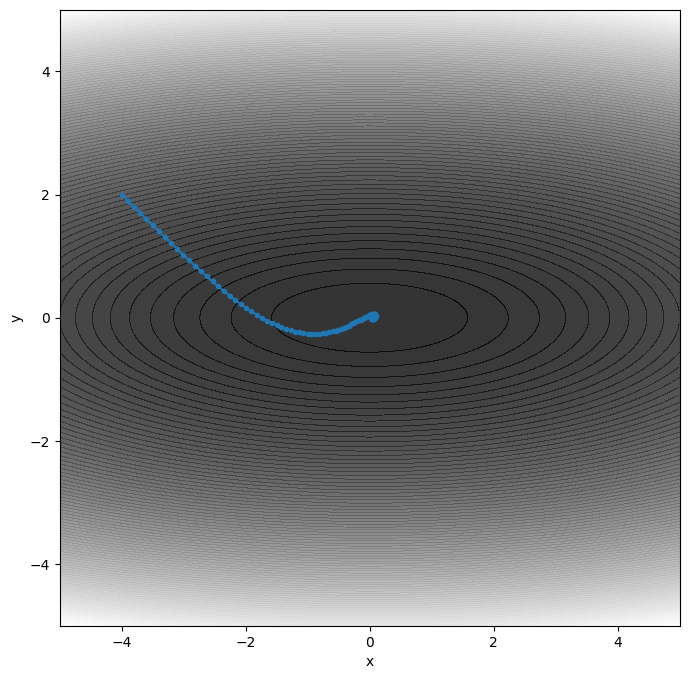

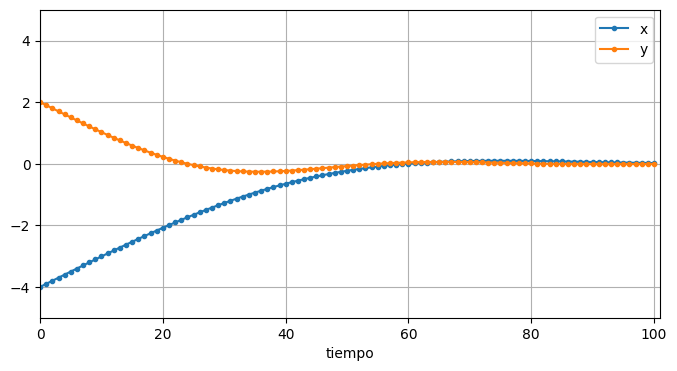

In [12]:
learning_rate = 0.1
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
hx, hy = train(f, -4.0, 2.0, optimizer, 100)
graficas(xx, yy, zz, hx, hy)

Ejemplo con un punto de silla:

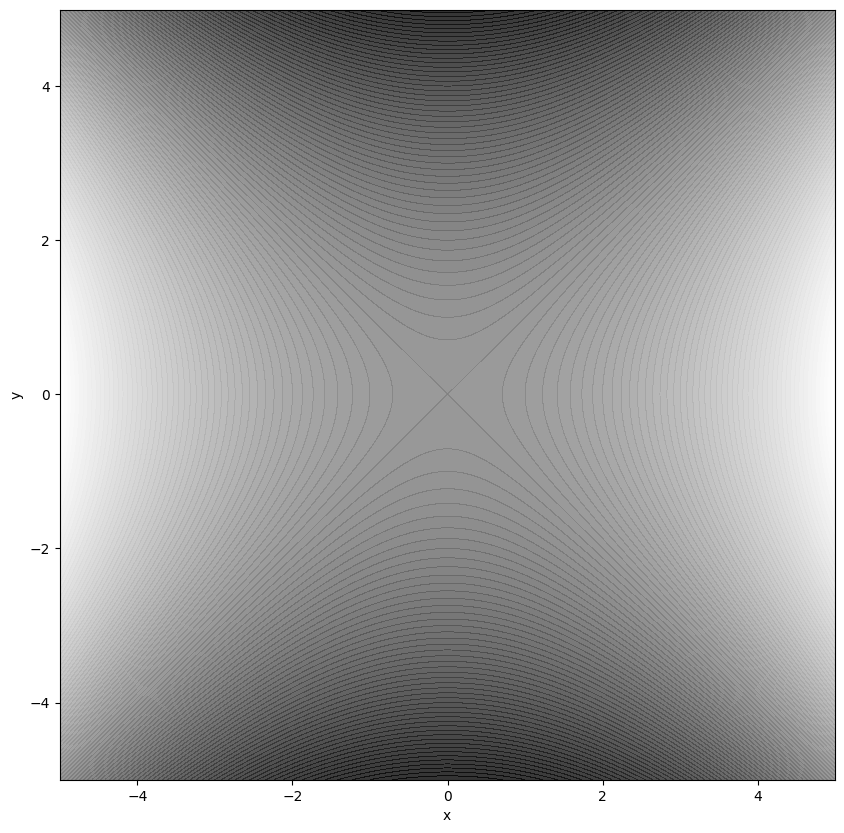

In [13]:
f2 = lambda x, y: cuadratica(x, y, a=1.0, b=-1.0, c=0.0)

xvalues = np.arange(-5.0, 5.0, 0.01)
yvalues = np.arange(-5.0, 5.0, 0.01)
xx, yy = np.meshgrid(xvalues, yvalues)

zz = f2(xx, yy)

plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, zz, 100, cmap="gray", alpha=.8)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

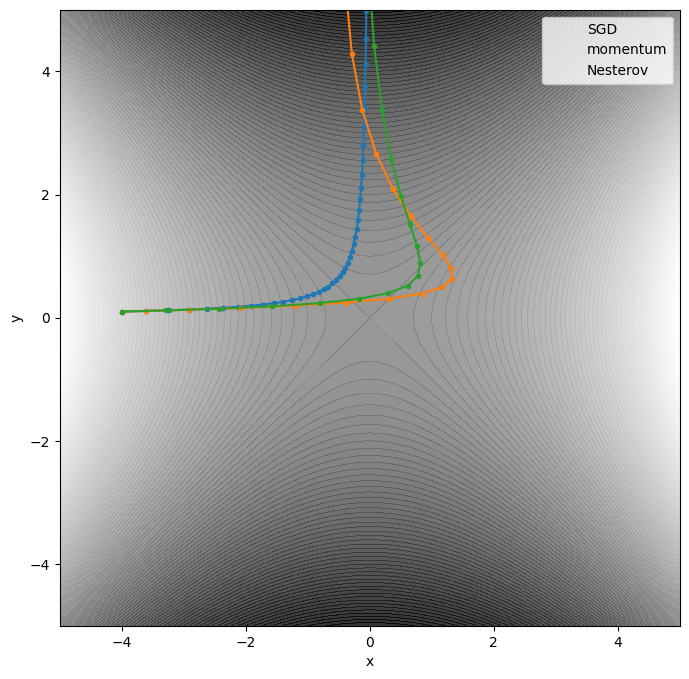

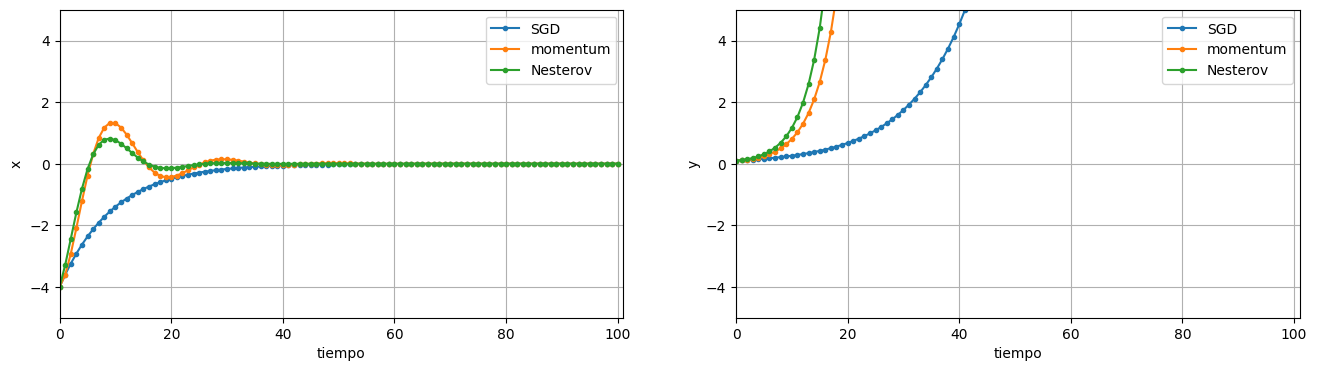

In [14]:
learning_rate = 0.05
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.0)
hx_sgd, hy_sgd = train(f2, -4.0, 0.1, optimizer, 100)
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.8, nesterov=False)
hx_momentum, hy_momentum = train(f2, -4.0, 0.1, optimizer, 100)
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.8, nesterov=True)
hx_nesterov, hy_nesterov = train(f2, -4.0, 0.1, optimizer, 100)

plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, zz, 100, cmap="gray", alpha=.8)
plt.plot(hx_sgd, hy_sgd, '.-')
plt.plot(hx_momentum, hy_momentum, '.-')
plt.plot(hx_nesterov, hy_nesterov, '.-')
plt.legend(('SGD', 'momentum', 'Nesterov'))
plt.xlabel('x')
plt.ylabel('y')
plt.axis([-5, 5, -5, 5])
plt.show()

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(hx_sgd, '.-')
plt.plot(hx_momentum, '.-')
plt.plot(hx_nesterov, '.-')
plt.grid(True)
plt.xlabel('tiempo')
plt.ylabel('x')
plt.legend(('SGD', 'momentum', 'Nesterov'))
plt.axis([0, len(hx), -5, 5])

plt.subplot(1, 2, 2)
plt.plot(hy_sgd, '.-')
plt.plot(hy_momentum, '.-')
plt.plot(hy_nesterov, '.-')
plt.grid(True)
plt.xlabel('tiempo')
plt.ylabel('y')
plt.legend(('SGD', 'momentum', 'Nesterov'))
plt.axis([0, len(hx), -5, 5])

plt.show()

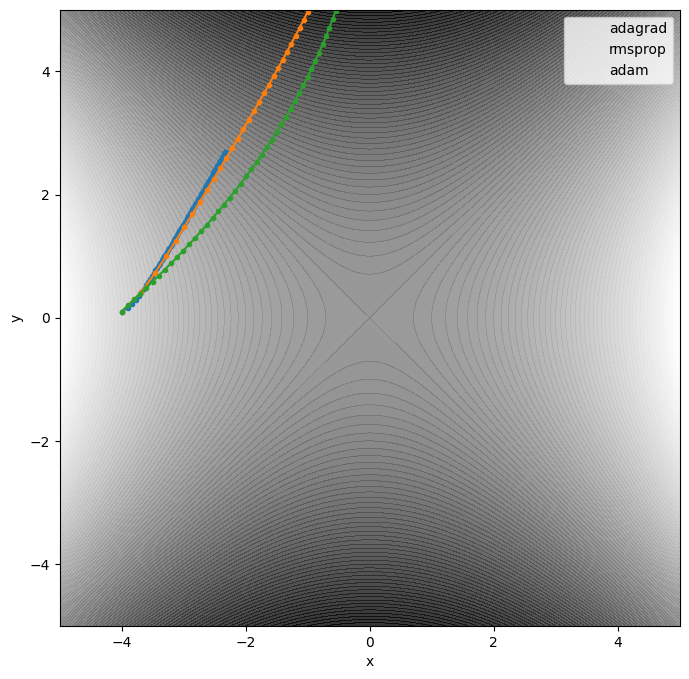

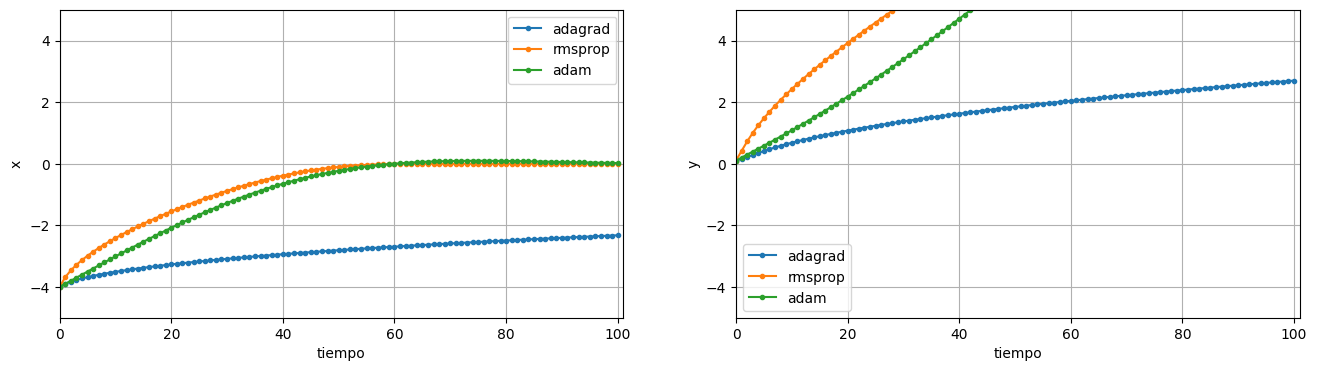

In [15]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.1)
hx_adagrad, hy_adagrad = train(f2, -4.0, 0.1, optimizer, 100)
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.1)
hx_rmsprop, hy_rmsprop = train(f2, -4.0, 0.1, optimizer, 100)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
hx_adam, hy_adam = train(f2, -4.0, 0.1, optimizer, 100)

plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, zz, 100, cmap="gray", alpha=.8)
plt.plot(hx_adagrad, hy_adagrad, '.-')
plt.plot(hx_rmsprop, hy_rmsprop, '.-')
plt.plot(hx_adam, hy_adam, '.-')
plt.legend(('adagrad', 'rmsprop', 'adam'))
plt.xlabel('x')
plt.ylabel('y')
plt.axis([-5, 5, -5, 5])
plt.show()

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(hx_adagrad, '.-')
plt.plot(hx_rmsprop, '.-')
plt.plot(hx_adam, '.-')
plt.grid(True)
plt.xlabel('tiempo')
plt.ylabel('x')
plt.legend(('adagrad', 'rmsprop', 'adam'))
plt.axis([0, len(hx), -5, 5])

plt.subplot(1, 2, 2)
plt.plot(hy_adagrad, '.-')
plt.plot(hy_rmsprop, '.-')
plt.plot(hy_adam, '.-')
plt.grid(True)
plt.xlabel('tiempo')
plt.ylabel('y')
plt.legend(('adagrad', 'rmsprop', 'adam'))
plt.axis([0, len(hx), -5, 5])

plt.show()